In [22]:
from preprocessing.text import tokenize
from fhnw.nlp.utils.storage import load_dataframe
from reporting.text import create_word_cloud

from pandas import concat
from data import file
from nltk import corpus

In [12]:

data_train = load_dataframe(file.news_articles_raw_train)
data_train

,text_original,label
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,Sport
1,"Erfundene Bilder zu Filmen, die als verloren g...",Kultur
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,Web
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",Wirtschaft
4,Estland sieht den künftigen österreichischen P...,Inland
...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,Inland
9241,Sandhere soll in vergangener Woche bei Luftang...,International
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,Wirtschaft
9243,Landeshauptmann will den vierten Regierungssit...,Inland


In [13]:
data_test = load_dataframe(file.news_articles_raw_test)
data_test


,text_original,label
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-...",Wirtschaft
1,Franzosen verteidigen 2:1-Führung – Kritische ...,Sport
2,Neues Video von Designern macht im Netz die Ru...,Web
3,23-jähriger Brasilianer muss vier Spiele pausi...,Sport
4,Aufständische verwendeten Chemikalie bei Gefec...,International
...,...,...
1023,"Programm ""Ebay Plus"" soll Ende September start...",Web
1024,"Fehlerhafte Bilanz 2013, Partei will berufen –...",Inland
1025,Als erster Olympia-Champion auch Hawaii-Sieger...,Sport
1026,Der Außenseiter aus Denver gewinnt die 50. Sup...,Sport


In [14]:

data_train_tokenized = concat([data_train, data_train.text_original.map(tokenize).rename('text_normalized')], axis=1)
data_train_tokenized

,text_original,label,text_normalized
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,Sport,"[21-jähriger, fällt, wohl, bis, saisonende, au..."
1,"Erfundene Bilder zu Filmen, die als verloren g...",Kultur,"[erfundene, bilder, zu, filmen, ,, die, als, v..."
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,Web,"[der, frischgekürte, ceo, sundar, pichai, setz..."
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",Wirtschaft,"[putin, :, ``, einigung, ,, dass, wir, menge, ..."
4,Estland sieht den künftigen österreichischen P...,Inland,"[estland, sieht, den, künftigen, österreichisc..."
...,...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,Inland,"[bernd, saurer, war, bridge-juniorenweltmeiste..."
9241,Sandhere soll in vergangener Woche bei Luftang...,International,"[sandhere, soll, in, vergangener, woche, bei, ..."
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,Wirtschaft,"[derzeit, konzeptgruppe, in, berlin, –, kein, ..."
9243,Landeshauptmann will den vierten Regierungssit...,Inland,"[landeshauptmann, will, den, vierten, regierun..."


In [ ]:
data_test_tokenized = concat([data_test, data_test.text_original.map(tokenize).rename('text_normalized')], axis=1)
data_test_tokenized


In [ ]:
stopwords = set(corpus.stopwords.words("german"))
stopwords

def ignore_stopwords(input):
     return [word for word in input if word not in stopwords]

In [26]:
data_train_tokenized_filtered = concat([data_train_tokenized, data_train_tokenized.text_normalized.map(ignore_stopwords).rename('text_filtered')], axis=1)
data_train_tokenized_filtered

,text_original,label,text_normalized,text_filtered
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,Sport,"[21-jähriger, fällt, wohl, bis, saisonende, au...","[21-jähriger, fällt, wohl, saisonende, ., wien..."
1,"Erfundene Bilder zu Filmen, die als verloren g...",Kultur,"[erfundene, bilder, zu, filmen, ,, die, als, v...","[erfundene, bilder, filmen, ,, verloren, gelte..."
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,Web,"[der, frischgekürte, ceo, sundar, pichai, setz...","[frischgekürte, ceo, sundar, pichai, setzt, um..."
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",Wirtschaft,"[putin, :, ``, einigung, ,, dass, wir, menge, ...","[putin, :, ``, einigung, ,, menge, niveau, jän..."
4,Estland sieht den künftigen österreichischen P...,Inland,"[estland, sieht, den, künftigen, österreichisc...","[estland, sieht, künftigen, österreichischen, ..."
...,...,...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,Inland,"[bernd, saurer, war, bridge-juniorenweltmeiste...","[bernd, saurer, bridge-juniorenweltmeister, ,,..."
9241,Sandhere soll in vergangener Woche bei Luftang...,International,"[sandhere, soll, in, vergangener, woche, bei, ...","[sandhere, vergangener, woche, luftangriff, ge..."
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,Wirtschaft,"[derzeit, konzeptgruppe, in, berlin, –, kein, ...","[derzeit, konzeptgruppe, berlin, –, kommentar,..."
9243,Landeshauptmann will den vierten Regierungssit...,Inland,"[landeshauptmann, will, den, vierten, regierun...","[landeshauptmann, vierten, regierungssitz, erh..."


In [27]:
data_test_tokenized_filtered = concat([data_test_tokenized, data_test_tokenized.text_normalized.map(ignore_stopwords).rename('text_filtered')], axis=1)
data_test_tokenized_filtered

,text_original,label,text_normalized,text_filtered
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-...",Wirtschaft,"[die, gewerkschaft, gpa-djp, lanciert, den, ``...","[gewerkschaft, gpa-djp, lanciert, ``, all-in-r..."
1,Franzosen verteidigen 2:1-Führung – Kritische ...,Sport,"[franzosen, verteidigen, 2:1-führung, –, kriti...","[franzosen, verteidigen, 2:1-führung, –, kriti..."
2,Neues Video von Designern macht im Netz die Ru...,Web,"[neues, video, von, designern, macht, im, netz...","[neues, video, designern, macht, netz, runde, ..."
3,23-jähriger Brasilianer muss vier Spiele pausi...,Sport,"[23-jähriger, brasilianer, muss, vier, spiele,...","[23-jähriger, brasilianer, vier, spiele, pausi..."
4,Aufständische verwendeten Chemikalie bei Gefec...,International,"[aufständische, verwendeten, chemikalie, bei, ...","[aufständische, verwendeten, chemikalie, gefec..."
...,...,...,...,...
1023,"Programm ""Ebay Plus"" soll Ende September start...",Web,"[programm, ``, ebay, plus, '', soll, ende, sep...","[programm, ``, ebay, plus, '', ende, september..."
1024,"Fehlerhafte Bilanz 2013, Partei will berufen –...",Inland,"[fehlerhafte, bilanz, 2013, ,, partei, will, b...","[fehlerhafte, bilanz, 2013, ,, partei, berufen..."
1025,Als erster Olympia-Champion auch Hawaii-Sieger...,Sport,"[als, erster, olympia-champion, auch, hawaii-s...","[erster, olympia-champion, hawaii-sieger, –, n..."
1026,Der Außenseiter aus Denver gewinnt die 50. Sup...,Sport,"[der, außenseiter, aus, denver, gewinnt, die, ...","[außenseiter, denver, gewinnt, 50, ., super, b..."


Sport


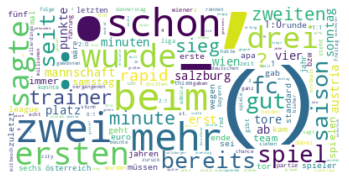

Kultur


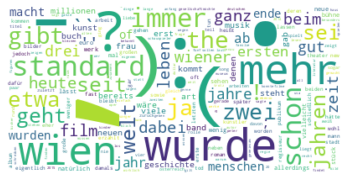

Web


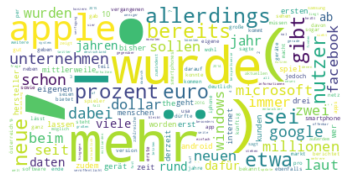

Wirtschaft


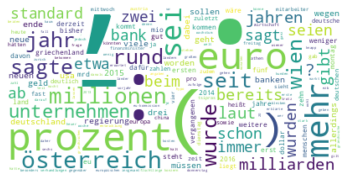

Inland


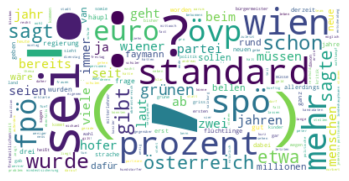

Etat


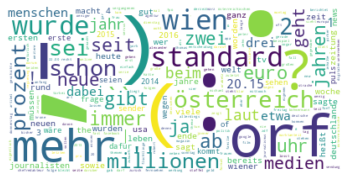

International


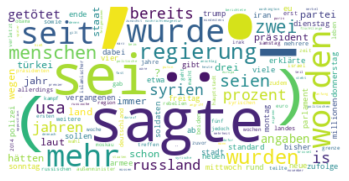

Panorama


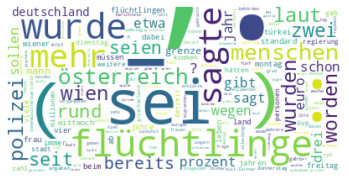

Wissenschaft


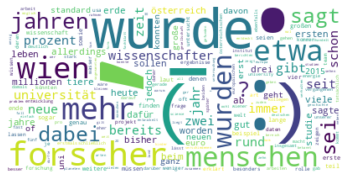

In [35]:



for label in data_train_tokenized_filtered["label"].unique():
    create_word_cloud(data_train_tokenized_filtered.loc[(data_train_tokenized["label"] == label)].text_filtered)